#### Imports

In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('time_series.csv', index_col=0).reset_index().rename(columns={'index':'Date'})

In [3]:
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x + "/2020"))
df.index=df["Date"]
df.drop(columns="Date",axis=1, inplace=True)

In [4]:
df.head()

,Total,Recovered,Hospital (non-ICU),ICU,Death,Active Cases
Date,,,,,,
2020-03-23,33,3,NaN,1.0,0,29
2020-03-24,42,6,NaN,1.0,0,35
2020-03-25,46,7,1.0,1.0,0,38
2020-03-26,54,10,3.0,1.0,0,43
2020-03-27,59,11,6.0,1.0,0,48


### Method 1: Estimate infected from deaths

Fatality rates based on https://www.nber.org/papers/w26965.pdf

In [5]:
lower_bound_fatality_rate = 0.001
upper_bound_fatality_rate = 0.01

In [6]:
df['Death_Lower_Est'] = df['Death'] / lower_bound_fatality_rate
df['Death_Upper_Est'] = df['Death'] / upper_bound_fatality_rate

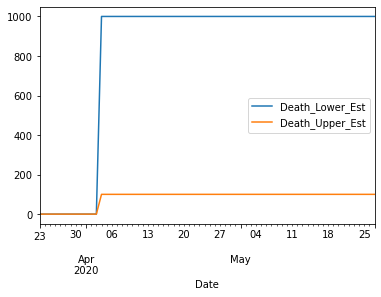

In [7]:
df[['Death_Lower_Est','Death_Upper_Est']].plot()
plt.pyplot.show()

### Method 2: Estimate infected from known cases

Detection rate based on http://www.uni-goettingen.de/en/606540.html

In [8]:
detection_rate = 0.11

In [9]:
df['Known_Est'] = df['Total'] / detection_rate

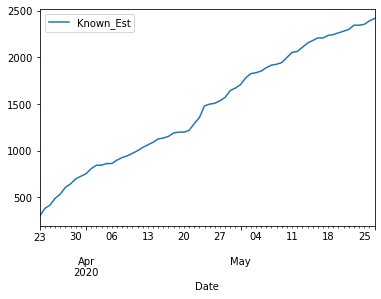

In [10]:
df[['Known_Est']].plot()
plt.pyplot.show()

### Method 3: Estimate infected from antibody tests

https://pasoroblesdailynews.com/covid-19-antibody-testing-now-available-in-paso-robles/108378/

https://www.emergencyslo.org/en/should-i-be-tested.aspx

### Summary

In [11]:
df['Upper_Bound'] = df[['Known_Est','Death_Lower_Est','Death_Upper_Est']].max(axis=1)
df['Lower_Bound'] = df[['Known_Est','Death_Lower_Est','Death_Upper_Est']].min(axis=1)
df['Mean'] = df[['Known_Est','Death_Lower_Est','Death_Upper_Est']].mean(axis=1)

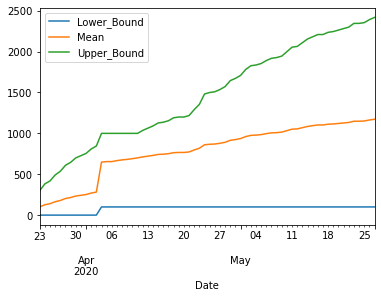

In [12]:
df[['Lower_Bound','Mean','Upper_Bound']].plot()
plt.pyplot.show()